In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datadotworld as dw
import numpy as np
import datetime 
import seaborn as sns
sns_cmap = sns.choose_diverging_palette()


In [2]:
#Pull data from data.world & describe columns
stat_data = dw.load_dataset("tatertot53/baseball-analysis",force_update=True)
stat_data.describe()

{'homepage': 'https://data.world/tatertot53/baseball-analysis',
 'name': 'tatertot53_baseball-analysis',
 'resources': [{'format': 'csv',
   'name': 'batting',
   'path': 'data/batting.csv'},
  {'format': 'csv',
   'name': 'bls_data_series',
   'path': 'data/bls_data_series.csv'},
  {'format': 'csv',
   'name': 'fangraphs_ss_data',
   'path': 'data/fangraphs_ss_data.csv'},
  {'format': 'csv', 'name': 'fielding', 'path': 'data/fielding.csv'},
  {'format': 'csv', 'name': 'salaries', 'path': 'data/salaries.csv'},
  {'format': 'csv', 'name': 'teams', 'path': 'data/teams.csv'},
  {'bytes': 6416242,
   'format': 'csv',
   'mediatype': 'text/csv',
   'name': 'original/Batting.csv',
   'path': 'original/Batting.csv'},
  {'bytes': 13354,
   'format': 'xlsx',
   'mediatype': 'application/vnd.openxmlformats-officedocument.spreadsheetml.sheet',
   'name': 'original/CPI 1913 to 2018.xlsx',
   'path': 'original/CPI 1913 to 2018.xlsx'},
  {'bytes': 295360,
   'format': 'csv',
   'mediatype': 'text/cs

In [3]:
#Shows key values for DF creation
stat_data.dataframes

LazyLoadedDict({'batting': LazyLoadedValue(<pandas.DataFrame>), 'bls_data_series': LazyLoadedValue(<pandas.DataFrame>), 'fangraphs_ss_data': LazyLoadedValue(<pandas.DataFrame>), 'fielding': LazyLoadedValue(<pandas.DataFrame>), 'salaries': LazyLoadedValue(<pandas.DataFrame>), 'teams': LazyLoadedValue(<pandas.DataFrame>)})

In [4]:
#Create Batting DF
batting_df = stat_data.dataframes['batting']
batting_df.tail()


C:\ProgramData\Anaconda3\lib\site-packages\datadotworld\models\dataset.py:194: UserWarning: Unable to set data frame dtypes automatically using batting schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 12
  'Error: {}'.format(resource_name, e))


,playerid,yearid,stint,teamid,lgid,g,ab,r,h,2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
104319,zimmejo02,2017,1,DET,AL,29,6,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
104320,zimmery01,2017,1,WAS,NL,144,524,90,159,33,...,108.0,1.0,0.0,44,126.0,1.0,3.0,0.0,5.0,16.0
104321,zobribe01,2017,1,CHN,NL,128,435,58,101,20,...,50.0,2.0,2.0,54,71.0,2.0,2.0,2.0,3.0,13.0
104322,zuninmi01,2017,1,SEA,AL,124,387,52,97,25,...,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0
104323,zychto01,2017,1,SEA,AL,45,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Create Salary DF
salary_df = stat_data.dataframes['salaries']
salary_df.head()

,yearid,teamid,lgid,playerid,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [88]:
#Group the salaries by mean 
yearly_average_salary = pd.DataFrame(salary_df.groupby('yearid').mean())
yearly_average_salary.head()

,salary
yearid,
1985,476299.447273
1986,417147.043360
1987,434729.465710
1988,453171.076923
1989,506323.081575


In [143]:
#Read inflation data from CSV
cpi = pd.read_csv("CPI_1985-2017_raw.csv")
cpi_df = pd.DataFrame(cpi)
cpi_year = cpi_df["yearid"]
cpi_df.set_index('yearid', inplace=True)
cpi_df.head()

,cpi
yearid,
1985,107.6
1986,109.6
1987,113.6
1988,118.3
1989,124.0


In [159]:
#Calculate inflation-adjusted average annual SS salary
cpi_adjust = cpi_df["cpi"]
current_cpi = cpi_df.iloc[-1][-1]
for i in yearly_average_salary:
    adjusted_yearly_average_salary = yearly_average_salary[i] * current_cpi / cpi_adjust
adjusted_yearly_average_salary.head()

yearid
1985    1.085042e+06
1986    9.329478e+05
1987    9.380360e+05
1988    9.389797e+05
1989    1.000886e+06
dtype: float64

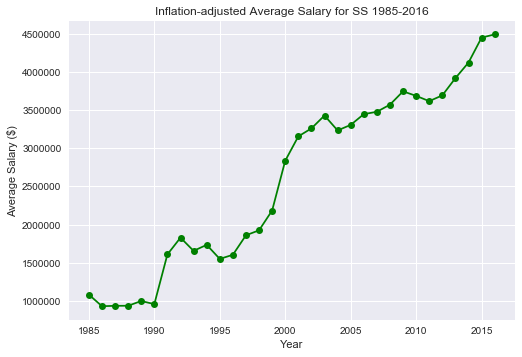

In [158]:
#Plot inflation-adjusted average annual salary
year = cpi_year
plt.plot(year, adjusted_yearly_average_salary, marker ="o", color="green", label=year)

plt.title("Inflation-adjusted Average Salary for SS 1985-2016")
plt.ylabel("Average Salary ($)")
plt.xlabel("Year")
plt.grid(True)

plt.show()

In [6]:
#Create Teams DF
teams_df = stat_data.dataframes['teams']
teams_df.tail()

C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using teams schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))


,yearid,lgid,teamid,franchid,divid,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,teamidbr,teamidlahman45,teamidretro
2860,2017,NL,SLN,STL,C,3,162,81.0,83,79,...,164,0.984,St. Louis Cardinals,Busch Stadium III,3447937.0,98,98,STL,SLN,SLN
2861,2017,AL,TBA,TBD,E,3,162,81.0,80,82,...,129,0.983,Tampa Bay Rays,Tropicana Field,1253619.0,94,94,TBR,TBA,TBA
2862,2017,AL,TEX,TEX,W,4,162,81.0,78,84,...,173,0.982,Texas Rangers,Rangers Ballpark in Arlington,2507760.0,107,107,TEX,TEX,TEX
2863,2017,AL,TOR,TOR,E,4,162,81.0,76,86,...,145,0.985,Toronto Blue Jays,Rogers Centre,3203886.0,105,105,TOR,TOR,TOR
2864,2017,NL,WAS,WSN,E,1,162,81.0,97,65,...,139,0.985,Washington Nationals,Nationals Park,2524980.0,103,102,WSN,MON,WAS


In [7]:
#Create Fielding DF
fielding_df = stat_data.dataframes['fielding']
fielding_df.head()

C:\Users\ckent\Anaconda3\envs\PythonData\lib\site-packages\datadotworld\models\dataset.py:192: UserWarning: Unable to set data frame dtypes automatically using fielding schema. Data types may need to be adjusted manually. Error: Integer column has NA values in column 7
  'Error: {}'.format(resource_name, e))


,playerid,yearid,stint,teamid,lgid,pos,g,gs,innouts,po,a,e,dp,pb,wp,sb,cs,zr
0,abercda01,1871,1,TRO,NaN,SS,1,1.0,24.0,1,3,2.0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,2B,22,22.0,606.0,67,72,42.0,5,NaN,NaN,NaN,NaN,NaN
2,addybo01,1871,1,RC1,NaN,SS,3,3.0,96.0,8,14,7.0,0,NaN,NaN,NaN,NaN,NaN
3,allisar01,1871,1,CL1,NaN,2B,2,0.0,18.0,1,4,0.0,0,NaN,NaN,NaN,NaN,NaN
4,allisar01,1871,1,CL1,NaN,OF,29,29.0,729.0,51,3,7.0,1,NaN,NaN,NaN,NaN,NaN


In [8]:
#Create People DF from CSV at data.world
names = pd.read_csv("people.csv")
names_df = pd.DataFrame(names)
names_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [9]:
#Check column names for Player Name DF
names_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [10]:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 24 columns):
playerID        19370 non-null object
birthYear       19244 non-null float64
birthMonth      19080 non-null float64
birthDay        18935 non-null float64
birthCountry    19302 non-null object
birthState      18846 non-null object
birthCity       19191 non-null object
deathYear       9550 non-null float64
deathMonth      9549 non-null float64
deathDay        9548 non-null float64
deathCountry    9545 non-null object
deathState      9499 non-null object
deathCity       9540 non-null object
nameFirst       19332 non-null object
nameLast        19370 non-null object
nameGiven       19332 non-null object
weight          18533 non-null float64
height          18615 non-null float64
bats            18185 non-null object
throws          18391 non-null object
debut           19174 non-null object
finalGame       19174 non-null object
retroID         19314 non-null object
bbrefID        

In [11]:
#Change dtypes of "debut" and "finalGame"
names_df['debut'] = pd.to_datetime(names_df['debut'])  
names_df['finalGame'] = pd.to_datetime(names_df['finalGame'])
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 24 columns):
playerID        19370 non-null object
birthYear       19244 non-null float64
birthMonth      19080 non-null float64
birthDay        18935 non-null float64
birthCountry    19302 non-null object
birthState      18846 non-null object
birthCity       19191 non-null object
deathYear       9550 non-null float64
deathMonth      9549 non-null float64
deathDay        9548 non-null float64
deathCountry    9545 non-null object
deathState      9499 non-null object
deathCity       9540 non-null object
nameFirst       19332 non-null object
nameLast        19370 non-null object
nameGiven       19332 non-null object
weight          18533 non-null float64
height          18615 non-null float64
bats            18185 non-null object
throws          18391 non-null object
debut           19174 non-null datetime64[ns]
finalGame       19174 non-null datetime64[ns]
retroID         19314 non-null object

In [12]:
#Filter for all years >= 1985, remove unnecessary columns
names_df = names_df[(names_df['debut'] >= datetime.date(1985,1,1)) & (names_df['finalGame'] >= datetime.date(1985,1,1))]
names_since_85 = names_df[['playerID','nameFirst','nameLast','nameGiven','debut','finalGame']]
names_since_85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 0 to 19369
Data columns (total 6 columns):
playerID     6577 non-null object
nameFirst    6577 non-null object
nameLast     6577 non-null object
nameGiven    6577 non-null object
debut        6577 non-null datetime64[ns]
finalGame    6577 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 359.7+ KB


In [13]:
#Check column names for Batting Stat DF
batting_df.columns

Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'g', 'ab', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh',
       'sf', 'gidp'],
      dtype='object')

In [14]:
#Rename "playerID" column to match other DFs, filter for all years >= 1985, and remove unnecessary columns.
batting_df = batting_df.rename(columns={'playerid':'playerID'})
batting_df = batting_df[batting_df['yearid'] >= 1985]
batting_since_85 = batting_df[['playerID','yearid','teamid','lgid','g','ab','r','h','2b','3b','hr','rbi','sb','cs','bb','so','ibb',
                       'hbp','sh','sf','gidp']]
batting_since_85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42071 entries, 62253 to 104323
Data columns (total 21 columns):
playerID    42071 non-null object
yearid      42071 non-null int64
teamid      42071 non-null object
lgid        42071 non-null object
g           42071 non-null int64
ab          42071 non-null int64
r           42071 non-null int64
h           42071 non-null int64
2b          42071 non-null int64
3b          42071 non-null int64
hr          42071 non-null int64
rbi         42071 non-null float64
sb          42071 non-null float64
cs          42071 non-null float64
bb          42071 non-null int64
so          42071 non-null float64
ibb         42071 non-null float64
hbp         42071 non-null float64
sh          42071 non-null float64
sf          42071 non-null float64
gidp        42071 non-null float64
dtypes: float64(9), int64(9), object(3)
memory usage: 7.1+ MB


In [15]:
#Check column names for Team Info DF
teams_df.columns

Index(['yearid', 'lgid', 'teamid', 'franchid', 'divid', 'rank', 'g', 'ghome',
       'w', 'l', 'divwin', 'wcwin', 'lgwin', 'wswin', 'r', 'ab', 'h', '2b',
       '3b', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf', 'ra', 'er', 'era',
       'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba', 'soa', 'e', 'dp', 'fp',
       'name', 'park', 'attendance', 'bpf', 'ppf', 'teamidbr',
       'teamidlahman45', 'teamidretro'],
      dtype='object')

In [16]:
#Filter for all years >= 1985, remove unnecessary columns
teams_df = teams_df[teams_df['yearid'] >= 1985]
teams_since_85 = teams_df[['yearid','rank','g','w','l','divwin','wswin','r','ab','h','2b','3b','hr','bb','so',
                     'sb','cs','hbp','sf','name']]
teams_since_85.tail()

,yearid,rank,g,w,l,divwin,wswin,r,ab,h,2b,3b,hr,bb,so,sb,cs,hbp,sf,name
2860,2017,3,162,83,79,False,False,761,5470,1402,284,28,196,593.0,1348.0,81.0,31.0,65.0,44.0,St. Louis Cardinals
2861,2017,3,162,80,82,False,False,694,5478,1340,226,32,228,545.0,1538.0,88.0,34.0,55.0,48.0,Tampa Bay Rays
2862,2017,4,162,78,84,False,False,799,5430,1326,255,21,237,544.0,1493.0,113.0,44.0,81.0,39.0,Texas Rangers
2863,2017,4,162,76,86,False,False,693,5499,1320,269,5,222,542.0,1327.0,53.0,24.0,51.0,35.0,Toronto Blue Jays
2864,2017,1,162,97,65,True,False,819,5553,1477,311,31,215,542.0,1327.0,108.0,30.0,31.0,45.0,Washington Nationals


In [17]:
#Filter for all years >= 1985, rename PlayerID column to match other DFs
salary_df = salary_df[salary_df['yearid'] >= 1985]
salary_df = salary_df.rename(columns={'playerid':'playerID'})
salary_since_85 = salary_df[['yearid','playerID','salary']]
salary_since_85.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26428 entries, 0 to 26427
Data columns (total 3 columns):
yearid      26428 non-null int64
playerID    26428 non-null object
salary      26428 non-null int64
dtypes: int64(2), object(1)
memory usage: 825.9+ KB


In [18]:
#Check column names for Fielding Info DF
fielding_df.columns

Index(['playerid', 'yearid', 'stint', 'teamid', 'lgid', 'pos', 'g', 'gs',
       'innouts', 'po', 'a', 'e', 'dp', 'pb', 'wp', 'sb', 'cs', 'zr'],
      dtype='object')

In [19]:
#Filter for all years >= 1985, remove unnecessary columns
fielding_df = fielding_df.rename(columns={'playerid':'playerID'})
fielding_df = fielding_df[fielding_df['yearid'] >= 1985]
fielding_since_1985 = fielding_df[['playerID','yearid','pos','gs']]
fielding_since_1985.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54560 entries, 84278 to 138837
Data columns (total 4 columns):
playerID    54560 non-null object
yearid      54560 non-null int64
pos         54560 non-null object
gs          54545 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [20]:
#Merging
merge_01 = pd.merge(names_since_85,salary_since_85, on='playerID', how='inner')
merge_01.head()

,playerID,nameFirst,nameLast,nameGiven,debut,finalGame,yearid,salary
0,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2004,300000
1,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2007,387500
2,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2008,403250
3,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2009,419000
4,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2010,2750000


In [21]:
#Merging
merge_02 = pd.merge(merge_01,batting_since_85,on=['playerID','yearid'],how='inner')
merge_02.head()

,playerID,nameFirst,nameLast,nameGiven,debut,finalGame,yearid,salary,teamid,lgid,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
0,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2004,300000,SFN,NL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2007,387500,CHA,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2008,403250,BOS,AL,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2009,419000,SEA,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,David,Aardsma,David Allan,2004-04-06,2015-08-23,2010,2750000,SEA,AL,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
#Merging
merge_03 = pd.merge(merge_02,fielding_since_1985,on=['playerID','yearid'],how='inner')
merge_03.columns

Index(['playerID', 'nameFirst', 'nameLast', 'nameGiven', 'debut', 'finalGame',
       'yearid', 'salary', 'teamid', 'lgid', 'g', 'ab', 'r', 'h', '2b', '3b',
       'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp',
       'pos', 'gs'],
      dtype='object')

In [23]:
merge_03.columns

Index(['playerID', 'nameFirst', 'nameLast', 'nameGiven', 'debut', 'finalGame',
       'yearid', 'salary', 'teamid', 'lgid', 'g', 'ab', 'r', 'h', '2b', '3b',
       'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ibb', 'hbp', 'sh', 'sf', 'gidp',
       'pos', 'gs'],
      dtype='object')

In [24]:
final_df = merge_03[merge_03['pos'] == 'SS']
final_df.head()

,playerID,nameFirst,nameLast,nameGiven,debut,finalGame,yearid,salary,teamid,lgid,...,cs,bb,so,ibb,hbp,sh,sf,gidp,pos,gs
32,abbotku01,Kurt,Abbott,Kurt Thomas,1993-09-07,2001-04-13,1993,109000,OAK,AL,...,0.0,3,20.0,0.0,0.0,3.0,0.0,3.0,SS,3.0
33,abbotku01,Kurt,Abbott,Kurt Thomas,1993-09-07,2001-04-13,1994,109000,FLO,NL,...,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,SS,93.0
34,abbotku01,Kurt,Abbott,Kurt Thomas,1993-09-07,2001-04-13,1995,119000,FLO,NL,...,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,SS,109.0
37,abbotku01,Kurt,Abbott,Kurt Thomas,1993-09-07,2001-04-13,1996,250000,FLO,NL,...,3.0,22,99.0,1.0,3.0,4.0,0.0,7.0,SS,41.0
41,abbotku01,Kurt,Abbott,Kurt Thomas,1993-09-07,2001-04-13,1997,650000,FLO,NL,...,1.0,14,68.0,3.0,1.0,6.0,0.0,5.0,SS,6.0


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 32 to 37745
Data columns (total 29 columns):
playerID     2869 non-null object
nameFirst    2869 non-null object
nameLast     2869 non-null object
nameGiven    2869 non-null object
debut        2869 non-null datetime64[ns]
finalGame    2869 non-null datetime64[ns]
yearid       2869 non-null int64
salary       2869 non-null int64
teamid       2869 non-null object
lgid         2869 non-null object
g            2869 non-null int64
ab           2869 non-null int64
r            2869 non-null int64
h            2869 non-null int64
2b           2869 non-null int64
3b           2869 non-null int64
hr           2869 non-null int64
rbi          2869 non-null float64
sb           2869 non-null float64
cs           2869 non-null float64
bb           2869 non-null int64
so           2869 non-null float64
ibb          2869 non-null float64
hbp          2869 non-null float64
sh           2869 non-null float64
sf           2869 non-null f